In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import re

#Importing library for stemming
from nltk.stem import PorterStemmer

#Importing library for lemmatizer
from nltk.stem import WordNetLemmatizer

import nltk
from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings('ignore')

In [2]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /Users/mukulgarg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/mukulgarg/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mukulgarg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mukulgarg/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
#Load Dataset File
#Replace the dataset file path with your own dataset path
dataset = pd.read_csv("data.csv")

In [4]:
#printing first 5 rows of data
dataset.head(5)

,Data
0,Watch or listen live weekdays at 8:30am MT at ...
1,Watch or listen live weekdays at 8:30am MT at ...
2,"Chubby And Hot, Always Stir The Pot!"
3,"Chubby And Hot, Always Stir The Pot!"
4,"Journalist, publisher of Rebel News — telling ..."


In [5]:
len(dataset)

7339

In [6]:
# Checking for duplicate rows
dataset[dataset.duplicated()].head(10)

,Data
1,Watch or listen live weekdays at 8:30am MT at ...
3,"Chubby And Hot, Always Stir The Pot!"
7,Albertan. Mom to children & dogs. Wife. Friend...
8,Albertan. Mom to children & dogs. Wife. Friend...
9,Albertan. Mom to children & dogs. Wife. Friend...
11,Former progressive conservative specializing i...
13,"I'm Kuno, a Gov't qualified service dog in Alb..."
14,Albertan. Mom to children & dogs. Wife. Friend...
15,Albertan. Mom to children & dogs. Wife. Friend...
16,Albertan. Mom to children & dogs. Wife. Friend...


In [7]:
# Total number of duplicated rows
dataset.duplicated().sum()

5353

In [8]:
#dropping duplicate rows to reduce computation
dataset = dataset.drop_duplicates()

In [9]:
len(dataset)

1986

In [10]:
#Joining all the text data into a single string
text_data = ' '.join(dataset['Data'].astype(str)).lower()
#text_data

In [11]:
#All text data into a single string
#text_data

In [12]:
review = re.sub('[^a-zA-Z0-9]',' ',text_data) #Removing non alpha-numeric characters from the text data
#review

In [13]:
tokenized_words = word_tokenize(review)

In [14]:
#print(tokenized_words)

In [15]:
len(tokenized_words)

32126

## Count of unique words/tokens before stemming/Lemmatization

In [17]:
unique_words = set(tokenized_words)

In [18]:
unique_word_counts = len(unique_words)

In [19]:
#print(unique_words)

In [20]:
unique_word_counts

7893

# Stemming

## Count of unique words/tokens After stemming

In [23]:
# Initializing Porter Stemmer
stemmer = PorterStemmer()

# Applying stemming to each word/token
stemmed_words = [stemmer.stem(token) for token in tokenized_words]

# Count unique tokens after stemming
stemmed_unique_words = set(stemmed_words)
stemmed_unique_words_count = len(stemmed_unique_words)

In [24]:
stemmed_unique_words_count

6528

In [25]:
#print(stemmed_unique_words)

In [26]:
print("Count of Unique words before stemming:",unique_word_counts)
print("Count of Unique words after stemming:",stemmed_unique_words_count)

Count of Unique words before stemming: 7893
Count of Unique words after stemming: 6528


## Q-B1: Use porter stemmer to run stemming. Count the number of unique words/tokens before and after stemming

## Stemming Result:
### As can be seen from above the number of unique words before and after stemming have been reduced from 7893 to 6528.

# Lemmatization

## Count of unique words/tokens after Lemmatization

In [30]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Applying lemmatization to each word/token
lemma_words = [lemmatizer.lemmatize(token) for token in tokenized_words]

# Count unique tokens after lemmatization
lemma_unique_words = set(lemma_words)
lemma_unique_words_count = len(lemma_unique_words)

In [31]:
#print(lemma_unique_words)

In [32]:
lemma_unique_words_count

7334

In [33]:
print("Count of Unique words before lemmatization:",unique_word_counts)
print("Count of Unique words after lemmatization:",lemma_unique_words_count)

Count of Unique words before lemmatization: 7893
Count of Unique words after lemmatization: 7334


## Q-B2: Perform lemmatization using NLTK lemmatizer . Count the number of unique words/tokens before and after lemmatization?

## Lemmatization Result:
### As can be seen from above the number of unique words before and after lemmatization have been reduced from 7893 to 7334.

## Q-B3: Compare the change in word frequencies from stemming and lemmatization. Which are the top 10 words after stemming/lemmatization?

In [36]:
from collections import Counter
import matplotlib.pyplot as plt

In [37]:
# Count word frequencies
stemmed_freq = Counter(stemmed_words)
lemmatized_freq = Counter(lemma_words)

In [38]:
# Get top 10 most common words
top_10_stemmed = stemmed_freq.most_common(10)
top_10_lemmatized = lemmatized_freq.most_common(10)

In [39]:
# Display results
print("🔍 Top 10 Words After Stemming:")
for word, count in top_10_stemmed:
    print(f"{word}: {count}")

🔍 Top 10 Words After Stemming:
and: 859
the: 768
of: 677
to: 497
a: 460
in: 417
for: 363
i: 339
my: 300
is: 235


In [40]:
print("\n🔍 Top 10 Words After Lemmatization:")
for word, count in top_10_lemmatized:
    print(f"{word}: {count}")


🔍 Top 10 Words After Lemmatization:
and: 859
the: 768
of: 677
a: 513
to: 497
in: 417
for: 363
i: 339
my: 300
is: 235


**Optional Just For Knowledge**

In [42]:
# Optional: Plot the comparison
stemmed_df = pd.DataFrame(top_10_stemmed, columns=['Word', 'Frequency']).set_index('Word')
lemmatized_df = pd.DataFrame(top_10_lemmatized, columns=['Word', 'Frequency']).set_index('Word')

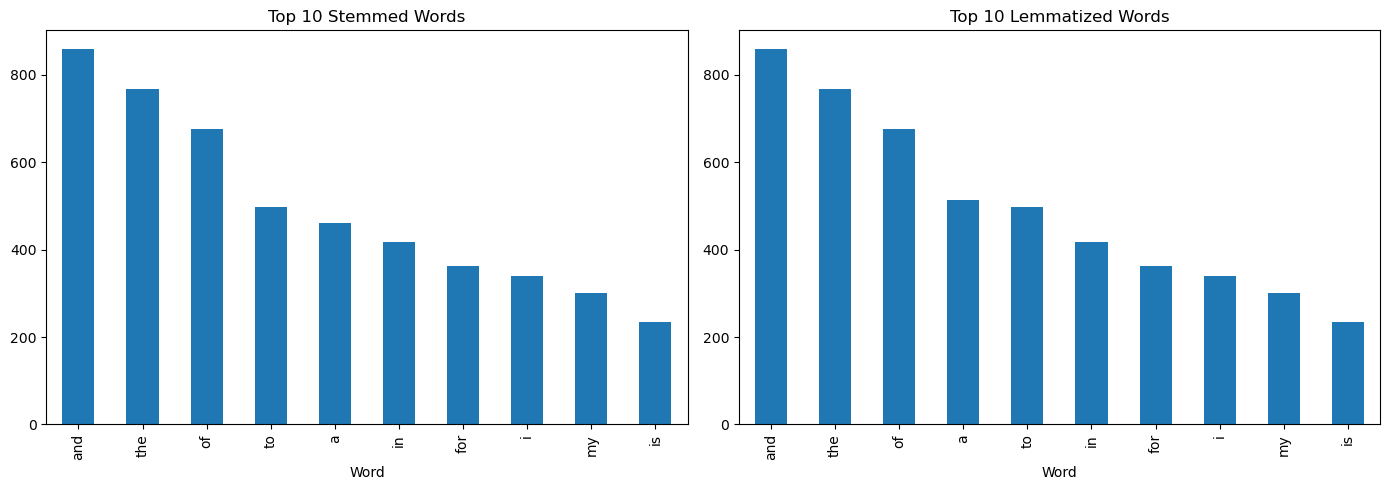

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
stemmed_df.plot.bar(ax=axes[0], title="Top 10 Stemmed Words", legend=False)
lemmatized_df.plot.bar(ax=axes[1], title="Top 10 Lemmatized Words", legend=False)
plt.tight_layout()
plt.show()

## Q-B4: What is the change in word frequencies if normalization is done after stop word removal?

In [45]:
#Importing Libraries
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mukulgarg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
sentences = nltk.sent_tokenize(text_data)

In [47]:
#sentences

In [48]:
# Removing special characters and lowercasing
import re
corpus=[]
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z0-9]',' ',sentences[i]) #substitutes values that are not a-z, A-Z, 0-9 with blank spaces
    review = re.sub(' +', ' ', review).strip() # removing extra blank spaces
    review = review.lower() #lowercasing
    corpus.append(review) 

In [49]:
#corpus

In [50]:
stop_words = set(stopwords.words('english'))
np.array(list(stop_words))

array(['yourself', 'too', 'through', 'didn', 'as', 'll', 'you', 'down',
       "should've", "isn't", 'once', 've', 'the', 'hasn', 's', 'that',
       'nor', 'under', 'ma', 're', 'up', 'very', 'whom', 'won', 'only',
       'such', 'wouldn', 'theirs', 'above', 'had', "it'll", 'she',
       'doing', 'i', 'again', 'on', 'below', 'he', "needn't", 'm',
       'mightn', "that'll", 'then', "she'd", "you've", 'her', 'those',
       'yours', 'be', 'other', 'or', 'from', 'here', "we're", 'ain',
       'shan', 'they', "it'd", 'wasn', "doesn't", 'at', 'mustn', "wasn't",
       'been', 'its', 'who', "he'd", 'has', "you'd", 'which', 'him',
       'any', "they'd", "they've", "i've", 'haven', 'myself', 'some',
       'couldn', 'ourselves', 'most', 'while', "hadn't", 'needn',
       'yourselves', 'we', "haven't", 'isn', 'a', 'but', "we'd",
       'himself', 'it', 'in', 'were', 'by', 'after', "shan't", "won't",
       "we'll", 'what', 'during', 'further', 'these', "i'd", 'an', 'when',
       'why', "must

## First removing stopwords and then applying stemming for normalization

In [52]:
tokens_a = []
for doc in corpus:
    words = word_tokenize(doc)
    filtered = [w for w in words if w not in stop_words]
    # stemming after stopwords removal
    stemmed = [stemmer.stem(w) for w in filtered]
    tokens_a.extend(stemmed)

In [53]:
len(tokens_a)

22821

## First removing stopwords and then applying lemmatization for normalization

In [55]:
tokens_b = []
for doc in corpus:
    words = word_tokenize(doc)
    filtered = [w for w in words if w not in stop_words]
    # lemmatization after stopwords removal
    lemmatized = [lemmatizer.lemmatize(w) for w in filtered]
    tokens_b.extend(lemmatized)

In [56]:
len(tokens_b)

22821

In [57]:
#Removing Stopwords after stemming
tokens_c = []
for doc in corpus:
    words = word_tokenize(doc)
     # stemming before stopwords removal
    stemmed = [stemmer.stem(w) for w in words]
    filtered = [w for w in stemmed if w not in stop_words]
    tokens_c.extend(filtered)

In [58]:
len(tokens_c)

22956

In [59]:
#Removing Stopwords after lemmatization
tokens_d = []
for doc in corpus:
    words = word_tokenize(doc)
     # lemmatization before stopwords removal
    lemmatize = [lemmatizer.lemmatize(w) for w in words]
    filtered = [w for w in lemmatize if w not in stop_words]
    tokens_d.extend(filtered)

In [60]:
len(tokens_d)

22852

In [61]:
print("Frequencies with Stopword removal After Stemming:")
print(Counter(tokens_c).most_common(10))

print("\nFrequencies with Stopword removal Before Stemming:")
print(Counter(tokens_a).most_common(10))

Frequencies with Stopword removal After Stemming:
[('alberta', 191), ('news', 134), ('love', 125), ('canada', 123), ('commun', 118), ('ca', 104), ('canadian', 102), ('polit', 100), ('live', 98), ('travel', 98)]

Frequencies with Stopword removal Before Stemming:
[('alberta', 191), ('news', 134), ('love', 125), ('canada', 123), ('commun', 118), ('ca', 104), ('canadian', 102), ('polit', 100), ('live', 98), ('travel', 98)]


In [62]:
print("\nFrequencies with Stopword removal After Lemmatization:")
print(Counter(tokens_b).most_common(10))

print("\nFrequencies with Stopword removal Before Lemmatization:")
print(Counter(tokens_b).most_common(10))


Frequencies with Stopword removal After Lemmatization:
[('alberta', 191), ('news', 134), ('canada', 123), ('ca', 104), ('love', 104), ('canadian', 102), ('life', 96), ('community', 92), ('com', 91), ('calgary', 91)]

Frequencies with Stopword removal Before Lemmatization:
[('alberta', 191), ('news', 134), ('canada', 123), ('ca', 104), ('love', 104), ('canadian', 102), ('life', 96), ('community', 92), ('com', 91), ('calgary', 91)]


### Frequencies remains unchanged maybe because normalization has no impact on stop words. Thus, the order for stemming/lemmatization and stop words removal does not matter.